In [15]:
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]

In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
from scipy import stats
import seaborn as sns

/home/ma/.bin/anaconda3/envs/kaggle/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [18]:
x = np.arange(0, max(n_params) +1)


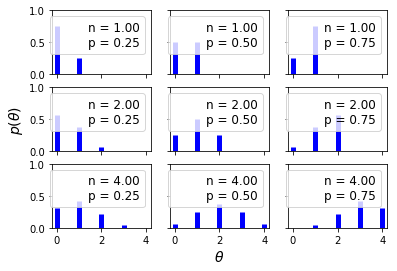

In [19]:
f, ax = plt.subplots(len(n_params), len(n_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, color='b', lw=5)
        ax[i,j].set_ylim(0,1)
        ax[i,j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend(fontsize=12)
    
ax[2,1].set_xlabel('$\\theta$', fontsize=14)
ax[1,0].set_ylabel('$p(\\theta)$', fontsize=14)
plt.savefig("img104.png")
plt.show()

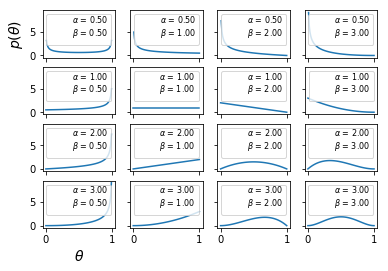

In [24]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0,0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a,b), alpha=0)
        ax[i,j].legend(fontsize=8)
        
ax[3,0].set_xlabel('$\\theta$', fontsize=14)    
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14)
plt.show()

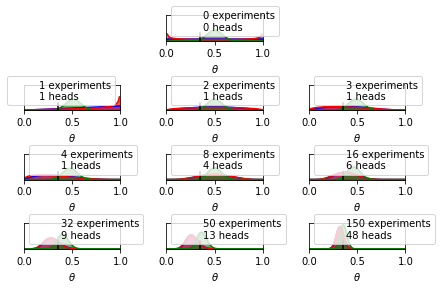

In [21]:
theta_real = 0.35
traials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta

x = np.linspace(0, 1, 100)

for idx, N in enumerate(traials):
    if idx ==0:
        plt.subplot(4, 3, 2)
    else:
        plt.subplot(4, 3, idx+3)
    
    y = data[idx]
    
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N -y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)

plt.savefig("img105.png")
plt.tight_layout()
plt.show()

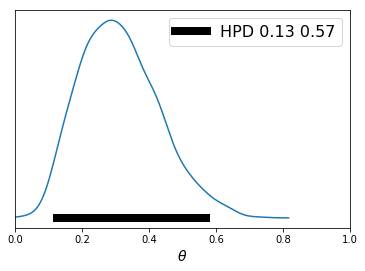

In [26]:
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0,0], label='HPD {:.2f} {:.2f}'.format(*HPD), linewidth=8,
            color='k')
    plt.legend(fontsize=16)
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])
    
np.random.seed(1)
post = stats.beta.rvs(5, 11, size=1000)

naive_hpd(post)
plt.xlim(0,1)
plt.savefig("img07.png")

plt.show()
    

In [27]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))


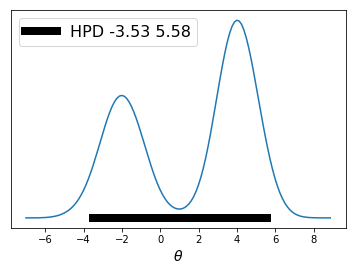

In [28]:
naive_hpd(mix_norm)
plt.show()

In [29]:
from plot_post import plot_post

ImportError: No module named 'plot_post'